In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Model From Scratch

In [2]:
df = pd.read_csv("datas/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop(columns='Outcome')
y = df['Outcome']

X_train = X.values
y_train = y.values

<Axes: xlabel='Outcome', ylabel='Age'>

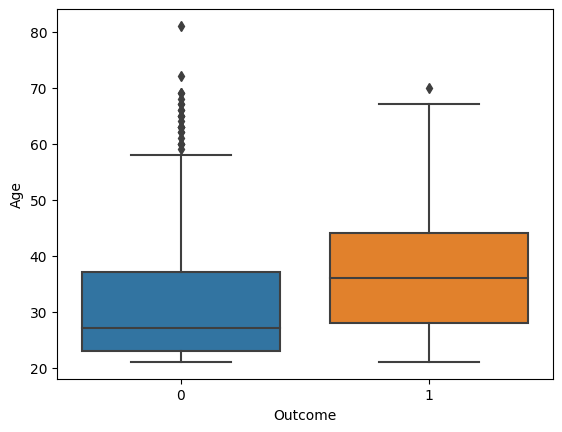

In [4]:
sns.boxplot(x=df['Outcome'],y=df['Age'])

## Model

In [5]:
class LogisticRegression:
     def __sigmoid(self,z):
         g=1/(1+np.exp(-z))
         return g
     def __compute_gradient(self,X,y,w,b):

         m = len(X.T)
         pred = self.__sigmoid(np.dot(w,X) + b) #X shape must be (8,768)
         diff = pred - y
   
         dj_dw = np.dot(X,diff) / m
         dj_db = np.sum(diff) / m
         return dj_dw,dj_db
         
     def fit(self,X,y,learning_rate,number_of_iterations):
         w_in = np.zeros(X.shape[1])
         b_in = 0.0
         for i in range(number_of_iterations):
             dj_dw,dj_db = self.__compute_gradient(X.T,y,w_in,b_in)
             w_in = w_in - learning_rate * dj_dw 
             b_in = b_in - learning_rate * dj_db


         self.W = w_in
         self.b = b_in
    
     def predict( self, X ):
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
        Y = np.where( Z > 0.5, 1, 0 )
        return Y
        
    

## Get accuracy

In [6]:
def getAccuracy(y_test,prediction):
    n = len(y_test)
    correct = y_test == prediction
    return np.sum(correct)/ n
    

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 1/3, random_state = 0 )

## Model Evaluation

In [8]:
model1 = LogisticRegression()
model1.fit(X_train,y_train,0.01,943)

In [9]:
prediction_1 = model1.predict(X_test)

In [10]:
print(f"Test Accuracy of our own Logistic Model : {getAccuracy(y_test,prediction_1)}")

Test Accuracy of our own Logistic Model : 0.58203125


## Comparing With Sklearn Model

In [11]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter=1000)
model2.fit( X_train, y_train)
prediction_2 = model2.predict(X_test)

print(f"Test Accuracy of sklearn Logistic Model : {getAccuracy(y_test,prediction_2)}")

Test Accuracy of sklearn Logistic Model : 0.78125
